## Importing the libraries

In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Importing the files

In [2]:
df=pd.read_csv("train_file_Imputation.csv")

In [3]:
df.describe()

,Patient_ID,YEAR,Subtopic,Sample_Size,Grade,StratID1,StratID2,StratID3,Greater_Risk_Probability
count,55399.000000,55399.000000,55399.000000,55399.000000,55399.000000,55399.000000,55399.000000,55399.000000,55399.000000
mean,27700.000000,2007.674308,0.747270,566.206339,2.238488,0.897327,2.718479,1.708695,24.365664
std,15992.458118,6.906621,0.434581,1148.727489,1.494005,0.826494,2.516150,1.448596,20.492551
min,1.000000,1991.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13850.500000,2003.000000,0.000000,165.000000,1.000000,0.000000,0.000000,0.000000,8.280050
50%,27700.000000,2009.000000,1.000000,275.000000,2.000000,1.000000,3.000000,2.000000,17.555600
75%,41549.500000,2013.000000,1.000000,560.500000,4.000000,2.000000,6.000000,3.000000,35.430750
max,55399.000000,2017.000000,1.000000,53664.000000,4.000000,2.000000,7.000000,4.000000,99.449400


In [4]:
df.head()

,Patient_ID,YEAR,LocationDesc,Subtopic,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,GeoLocation,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability
0,1,1995,"Houston, TX",1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",335.0,Female,Hispanic or Latino,4,"(29.760427, -95.369803)",H49,1,4,0,Local,7.4793
1,2,1997,"Houston, TX",0,Currently drank alcohol,"at least one drink of alcohol, on at least 1 d...",382.0,Total,Black or African American,4,"(29.760427, -95.369803)",H42,0,3,0,Local,49.6852
2,3,1993,Nevada,0,Had their first drink of alcohol before age 13...,other than a few sips,196.0,Female,White,0,"(39.493240390000494, -117.07184056399967)",H41,1,6,2,State,47.8132
3,4,2017,Pennsylvania,1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",104.0,Male,Asian,4,"(40.79373015200048, -77.86070029399963)",H49,2,2,0,State,3.4554
4,5,2007,"San Francisco, CA",1,Ever took steroids without a doctor's prescrip...,"pills or shots, one or more times during their...",100.0,Female,Multiple Race,4,"(37.77493, -122.419416)",H55,1,7,0,Local,0.0000


In [5]:
df.columns

Index(['Patient_ID', 'YEAR', 'LocationDesc', 'Subtopic',
       'Greater_Risk_Question', 'Description', 'Sample_Size', 'Sex', 'Race',
       'Grade', 'GeoLocation', 'QuestionCode', 'StratID1', 'StratID2',
       'StratID3', 'StratificationType', 'Greater_Risk_Probability'],
      dtype='object')

In [6]:
# new data frame with split value columns 
new = df["GeoLocation"].str.split(", ", n = 1, expand = True) 
  
# making seperate first name column from new data frame 
df["x_loc"]= new[0] 
  
# making seperate last name column from new data frame 
df["y_loc"]= new[1] 
  
# Dropping old Name columns 
#df.drop(columns =["Name"], inplace = True) 

In [7]:
df.head()

,Patient_ID,YEAR,LocationDesc,Subtopic,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,GeoLocation,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability,x_loc,y_loc
0,1,1995,"Houston, TX",1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",335.0,Female,Hispanic or Latino,4,"(29.760427, -95.369803)",H49,1,4,0,Local,7.4793,(29.760427,-95.369803)
1,2,1997,"Houston, TX",0,Currently drank alcohol,"at least one drink of alcohol, on at least 1 d...",382.0,Total,Black or African American,4,"(29.760427, -95.369803)",H42,0,3,0,Local,49.6852,(29.760427,-95.369803)
2,3,1993,Nevada,0,Had their first drink of alcohol before age 13...,other than a few sips,196.0,Female,White,0,"(39.493240390000494, -117.07184056399967)",H41,1,6,2,State,47.8132,(39.493240390000494,-117.07184056399967)
3,4,2017,Pennsylvania,1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",104.0,Male,Asian,4,"(40.79373015200048, -77.86070029399963)",H49,2,2,0,State,3.4554,(40.79373015200048,-77.86070029399963)
4,5,2007,"San Francisco, CA",1,Ever took steroids without a doctor's prescrip...,"pills or shots, one or more times during their...",100.0,Female,Multiple Race,4,"(37.77493, -122.419416)",H55,1,7,0,Local,0.0000,(37.77493,-122.419416)


In [8]:
def impute_geoloc_x(cols):
    #print(cols)
    #cols.strip()
    cols=cols.replace("(","")
    #print(str(col[0]))
#     x_loc =float(str(col[0]))
#     y_loc =float(str(col[1]))
    #print("vvvvv,",x_loc,y_loc)
    return cols

In [9]:
df["x_loc"] =df["x_loc"].astype("str")
df["x_loc"] =df["x_loc"].apply(impute_geoloc_x) 
df["x_loc"] =df["x_loc"].astype("float")

In [10]:
df["x_loc"].head()

0    29.760427
1    29.760427
2    39.493240
3    40.793730
4    37.774930
Name: x_loc, dtype: float64

In [11]:
def impute_geoloc_y(cols):
    #print(cols)
    #cols.strip()
    cols=cols.replace(")","")
    #print(str(col[0]))
#     x_loc =float(str(col[0]))
#     y_loc =float(str(col[1]))
    #print("vvvvv,",x_loc,y_loc)
    return cols

In [12]:
df["y_loc"] =df["y_loc"].astype("str")
df["y_loc"] =df["y_loc"].apply(impute_geoloc_y) 
df["y_loc"] =df["y_loc"].astype("float")

In [13]:
df["y_loc"].head()

0    -95.369803
1    -95.369803
2   -117.071841
3    -77.860700
4   -122.419416
Name: y_loc, dtype: float64

In [14]:
df.head()

,Patient_ID,YEAR,LocationDesc,Subtopic,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,GeoLocation,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability,x_loc,y_loc
0,1,1995,"Houston, TX",1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",335.0,Female,Hispanic or Latino,4,"(29.760427, -95.369803)",H49,1,4,0,Local,7.4793,29.760427,-95.369803
1,2,1997,"Houston, TX",0,Currently drank alcohol,"at least one drink of alcohol, on at least 1 d...",382.0,Total,Black or African American,4,"(29.760427, -95.369803)",H42,0,3,0,Local,49.6852,29.760427,-95.369803
2,3,1993,Nevada,0,Had their first drink of alcohol before age 13...,other than a few sips,196.0,Female,White,0,"(39.493240390000494, -117.07184056399967)",H41,1,6,2,State,47.8132,39.493240,-117.071841
3,4,2017,Pennsylvania,1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",104.0,Male,Asian,4,"(40.79373015200048, -77.86070029399963)",H49,2,2,0,State,3.4554,40.793730,-77.860700
4,5,2007,"San Francisco, CA",1,Ever took steroids without a doctor's prescrip...,"pills or shots, one or more times during their...",100.0,Female,Multiple Race,4,"(37.77493, -122.419416)",H55,1,7,0,Local,0.0000,37.774930,-122.419416


In [15]:
df.columns

Index(['Patient_ID', 'YEAR', 'LocationDesc', 'Subtopic',
       'Greater_Risk_Question', 'Description', 'Sample_Size', 'Sex', 'Race',
       'Grade', 'GeoLocation', 'QuestionCode', 'StratID1', 'StratID2',
       'StratID3', 'StratificationType', 'Greater_Risk_Probability', 'x_loc',
       'y_loc'],
      dtype='object')

In [16]:
df_imputation = df.drop(['Patient_ID','LocationDesc','Subtopic','Greater_Risk_Question', 'Description','GeoLocation'],axis=1)

In [17]:
df_imputation.head()

,YEAR,Sample_Size,Sex,Race,Grade,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability,x_loc,y_loc
0,1995,335.0,Female,Hispanic or Latino,4,H49,1,4,0,Local,7.4793,29.760427,-95.369803
1,1997,382.0,Total,Black or African American,4,H42,0,3,0,Local,49.6852,29.760427,-95.369803
2,1993,196.0,Female,White,0,H41,1,6,2,State,47.8132,39.493240,-117.071841
3,2017,104.0,Male,Asian,4,H49,2,2,0,State,3.4554,40.793730,-77.860700
4,2007,100.0,Female,Multiple Race,4,H55,1,7,0,Local,0.0000,37.774930,-122.419416


In [18]:
sex = pd.get_dummies(df["Sex"])
sex.head()

,Female,Male,Total
0,1,0,0
1,0,0,1
2,1,0,0
3,0,1,0
4,1,0,0


In [19]:
race=pd.get_dummies(df["Race"])
race.head()

,American Indian or Alaska Native,Asian,Black or African American,Hispanic or Latino,Multiple Race,Native Hawaiian or Other Pacific Islander,Total,White
0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0


In [20]:
QuestionCode=pd.get_dummies(df["QuestionCode"])
QuestionCode.head()

,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49,H50,H51,H52,H53,H54,H55,H56,H57,H58,QNHALLUCDRUG
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [21]:
StratificationType=pd.get_dummies(df["StratificationType"])
StratificationType.head()

,Local,National,Other,State,Territory
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,1,0,0,0,0


In [22]:
StratID1=pd.get_dummies(df["StratID1"])
StratID1.head()

,0,1,2
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [23]:
StratID2=pd.get_dummies(df["StratID2"])
StratID2.head()

,0,1,2,3,4,5,6,7
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1


In [24]:
StratID3=pd.get_dummies(df["StratID3"])
StratID3.head()

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [25]:
df_imputation.columns

Index(['YEAR', 'Sample_Size', 'Sex', 'Race', 'Grade', 'QuestionCode',
       'StratID1', 'StratID2', 'StratID3', 'StratificationType',
       'Greater_Risk_Probability', 'x_loc', 'y_loc'],
      dtype='object')

In [26]:
df_imputation = df_imputation.drop(['Sex', 'Race', 'Grade', 'QuestionCode','StratID1', 'StratID2', 'StratID3', 'StratificationType'],axis=1)

In [27]:
df_imputation = pd.concat([df_imputation,sex,race,QuestionCode,StratID1, StratID2, StratID3, StratificationType],axis=1)

In [28]:
df_imputation.head()

,YEAR,Sample_Size,Greater_Risk_Probability,x_loc,y_loc,Female,Male,Total,American Indian or Alaska Native,Asian,...,0,1,2,3,4,Local,National,Other,State,Territory
0,1995,335.0,7.4793,29.760427,-95.369803,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1997,382.0,49.6852,29.760427,-95.369803,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1993,196.0,47.8132,39.493240,-117.071841,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,2017,104.0,3.4554,40.793730,-77.860700,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,2007,100.0,0.0000,37.774930,-122.419416,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [180]:
X = df_imputation.drop(["Greater_Risk_Probability"],axis=1)
X = X.dropna()
X= X.round(3)
X = preprocessing.scale(X)

In [181]:
y = df_imputation["Greater_Risk_Probability"]
y = y.dropna()
y = y.round(3)
y = preprocessing.scale(y)

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=30,test_size =0.30)

In [184]:
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression, LogisticRegression, ElasticNet
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

In [185]:
#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [186]:
mod_LR = LinearRegression(n_jobs=-1,normalize=True)

In [187]:
mod_LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [188]:
#X_test = map(float(),X_test)

prediction = mod_LR.predict(X_test)

In [189]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [190]:
mae = mean_absolute_error(y_test,prediction)
print(mae)

0.27473661083299566


In [191]:
mse = mean_squared_error(y_test,prediction)
print(mse)

0.13888059074526996


In [192]:
rsqr = r2_score(y_test,prediction)
print(rsqr)

0.8594307074900046


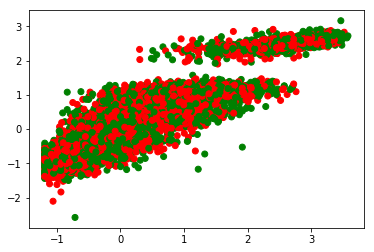

In [193]:
colors = ("red", "green")
plt.scatter(y_test,prediction,cmap="virdis",c=colors)

In [194]:
# mae_sum = 0
# for X_test, x in zip(X_test, y_test):
#     prediction = mod_LR.predict(y_test)
#     mae_sum += abs(X_test - prediction)
# mae = mae_sum / len(X_test)
# print(mae)

C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


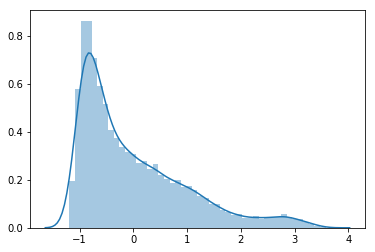

In [195]:
sns.distplot(y_test)

C:\Users\Manuj Mehrotra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


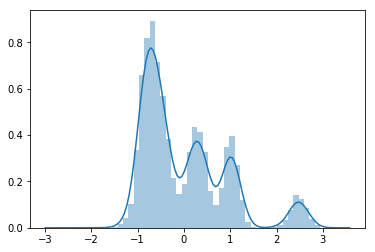

In [196]:
sns.distplot(prediction)

In [197]:
mod_Lasso = LassoCV(n_jobs=-1,cv=10)

In [198]:
mod_Lasso.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=-1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [199]:
#X_test = map(float(),X_test)

prediction = mod_Lasso.predict(X_test)

In [200]:
mae = mean_absolute_error(y_test,prediction)
print(mae)

0.274176577163267


In [201]:
mae = mean_squared_error(y_test,prediction)
print(mae)

0.13886636962453788


In [202]:
rsqr = r2_score(y_test,prediction)
print(rsqr)

0.859445101530736


In [203]:
alpha = [0.001, 0.0001, 0.002, 0.02, 0.01, 0.1, 0.5]   
for alphas in alpha:    
    mod_Elastic = ElasticNet(alpha=alphas)
    mod_Elastic.fit(X_train,y_train)
    prediction = mod_Lasso.predict(X_test)
    mae = mean_absolute_error(y_test,prediction)
    print(mae)
    mae = mean_squared_error(y_test,prediction)
    print(mae)
    rsqr = r2_score(y_test,prediction)
    print(rsqr)
    print("-------------------------------------------------------")

0.274176577163267
0.13886636962453788
0.859445101530736
-------------------------------------------------------
0.274176577163267
0.13886636962453788
0.859445101530736
-------------------------------------------------------
0.274176577163267
0.13886636962453788
0.859445101530736
-------------------------------------------------------
0.274176577163267
0.13886636962453788
0.859445101530736
-------------------------------------------------------
0.274176577163267
0.13886636962453788
0.859445101530736
-------------------------------------------------------
0.274176577163267
0.13886636962453788
0.859445101530736
-------------------------------------------------------
0.274176577163267
0.13886636962453788
0.859445101530736
-------------------------------------------------------


In [204]:
y_test.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [205]:
from lightgbm import LGBMRegressor

In [206]:
model = LGBMRegressor(learning_rate=8e-2, n_estimators=3000).fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='mae')


[1]	valid_0's l2: 0.856502	valid_0's l1: 0.740791
[2]	valid_0's l2: 0.745045	valid_0's l1: 0.69054
[3]	valid_0's l2: 0.650386	valid_0's l1: 0.644835
[4]	valid_0's l2: 0.569903	valid_0's l1: 0.603279
[5]	valid_0's l2: 0.501851	valid_0's l1: 0.565868
[6]	valid_0's l2: 0.444115	valid_0's l1: 0.532076
[7]	valid_0's l2: 0.394721	valid_0's l1: 0.501481
[8]	valid_0's l2: 0.352833	valid_0's l1: 0.474109
[9]	valid_0's l2: 0.31713	valid_0's l1: 0.449403
[10]	valid_0's l2: 0.286815	valid_0's l1: 0.427237
[11]	valid_0's l2: 0.260605	valid_0's l1: 0.407243
[12]	valid_0's l2: 0.238367	valid_0's l1: 0.389283
[13]	valid_0's l2: 0.219469	valid_0's l1: 0.373092
[14]	valid_0's l2: 0.20338	valid_0's l1: 0.35866
[15]	valid_0's l2: 0.189363	valid_0's l1: 0.345649
[16]	valid_0's l2: 0.177239	valid_0's l1: 0.333664
[17]	valid_0's l2: 0.166825	valid_0's l1: 0.322991
[18]	valid_0's l2: 0.157738	valid_0's l1: 0.313124
[19]	valid_0's l2: 0.149893	valid_0's l1: 0.304472
[20]	valid_0's l2: 0.143085	valid_0's l1: 0.

[178]	valid_0's l2: 0.0579879	valid_0's l1: 0.175709
[179]	valid_0's l2: 0.0579478	valid_0's l1: 0.175624
[180]	valid_0's l2: 0.0579016	valid_0's l1: 0.175553
[181]	valid_0's l2: 0.0578423	valid_0's l1: 0.175457
[182]	valid_0's l2: 0.0578016	valid_0's l1: 0.175379
[183]	valid_0's l2: 0.0576609	valid_0's l1: 0.175158
[184]	valid_0's l2: 0.0575312	valid_0's l1: 0.174947
[185]	valid_0's l2: 0.0574658	valid_0's l1: 0.174838
[186]	valid_0's l2: 0.057432	valid_0's l1: 0.174782
[187]	valid_0's l2: 0.0573714	valid_0's l1: 0.174682
[188]	valid_0's l2: 0.0573423	valid_0's l1: 0.174616
[189]	valid_0's l2: 0.0572767	valid_0's l1: 0.174539
[190]	valid_0's l2: 0.0572418	valid_0's l1: 0.17449
[191]	valid_0's l2: 0.0571919	valid_0's l1: 0.174399
[192]	valid_0's l2: 0.0571109	valid_0's l1: 0.17428
[193]	valid_0's l2: 0.0570535	valid_0's l1: 0.174175
[194]	valid_0's l2: 0.0569687	valid_0's l1: 0.174061
[195]	valid_0's l2: 0.0568365	valid_0's l1: 0.173844
[196]	valid_0's l2: 0.056796	valid_0's l1: 0.1737

[356]	valid_0's l2: 0.0519893	valid_0's l1: 0.165584
[357]	valid_0's l2: 0.0519826	valid_0's l1: 0.165577
[358]	valid_0's l2: 0.0519816	valid_0's l1: 0.165567
[359]	valid_0's l2: 0.0519826	valid_0's l1: 0.165567
[360]	valid_0's l2: 0.051983	valid_0's l1: 0.165575
[361]	valid_0's l2: 0.0519663	valid_0's l1: 0.16556
[362]	valid_0's l2: 0.051967	valid_0's l1: 0.165561
[363]	valid_0's l2: 0.0519536	valid_0's l1: 0.165528
[364]	valid_0's l2: 0.05194	valid_0's l1: 0.165516
[365]	valid_0's l2: 0.0519242	valid_0's l1: 0.165489
[366]	valid_0's l2: 0.0519232	valid_0's l1: 0.165486
[367]	valid_0's l2: 0.0518847	valid_0's l1: 0.16544
[368]	valid_0's l2: 0.0518619	valid_0's l1: 0.165382
[369]	valid_0's l2: 0.0518396	valid_0's l1: 0.165355
[370]	valid_0's l2: 0.0518292	valid_0's l1: 0.165339
[371]	valid_0's l2: 0.0517961	valid_0's l1: 0.165268
[372]	valid_0's l2: 0.0517829	valid_0's l1: 0.165239
[373]	valid_0's l2: 0.0517698	valid_0's l1: 0.165223
[374]	valid_0's l2: 0.0517655	valid_0's l1: 0.165211

[536]	valid_0's l2: 0.0494395	valid_0's l1: 0.161026
[537]	valid_0's l2: 0.0494182	valid_0's l1: 0.160991
[538]	valid_0's l2: 0.0494016	valid_0's l1: 0.160969
[539]	valid_0's l2: 0.0493776	valid_0's l1: 0.160932
[540]	valid_0's l2: 0.049361	valid_0's l1: 0.160899
[541]	valid_0's l2: 0.0493546	valid_0's l1: 0.160897
[542]	valid_0's l2: 0.0493381	valid_0's l1: 0.160863
[543]	valid_0's l2: 0.0493055	valid_0's l1: 0.160797
[544]	valid_0's l2: 0.0492967	valid_0's l1: 0.160786
[545]	valid_0's l2: 0.0492946	valid_0's l1: 0.160774
[546]	valid_0's l2: 0.0492973	valid_0's l1: 0.160776
[547]	valid_0's l2: 0.0492964	valid_0's l1: 0.16077
[548]	valid_0's l2: 0.0492632	valid_0's l1: 0.160722
[549]	valid_0's l2: 0.0492452	valid_0's l1: 0.160686
[550]	valid_0's l2: 0.0492431	valid_0's l1: 0.160688
[551]	valid_0's l2: 0.0492344	valid_0's l1: 0.160655
[552]	valid_0's l2: 0.0492228	valid_0's l1: 0.160631
[553]	valid_0's l2: 0.0491772	valid_0's l1: 0.160548
[554]	valid_0's l2: 0.0491704	valid_0's l1: 0.16

[714]	valid_0's l2: 0.0475516	valid_0's l1: 0.157525
[715]	valid_0's l2: 0.0475406	valid_0's l1: 0.157502
[716]	valid_0's l2: 0.0475358	valid_0's l1: 0.1575
[717]	valid_0's l2: 0.0475278	valid_0's l1: 0.157492
[718]	valid_0's l2: 0.0475197	valid_0's l1: 0.157479
[719]	valid_0's l2: 0.047515	valid_0's l1: 0.157478
[720]	valid_0's l2: 0.0474936	valid_0's l1: 0.157439
[721]	valid_0's l2: 0.047489	valid_0's l1: 0.157431
[722]	valid_0's l2: 0.047486	valid_0's l1: 0.157428
[723]	valid_0's l2: 0.0474777	valid_0's l1: 0.157415
[724]	valid_0's l2: 0.0474675	valid_0's l1: 0.157397
[725]	valid_0's l2: 0.0474534	valid_0's l1: 0.157371
[726]	valid_0's l2: 0.0474522	valid_0's l1: 0.157369
[727]	valid_0's l2: 0.0474346	valid_0's l1: 0.157325
[728]	valid_0's l2: 0.0474252	valid_0's l1: 0.157302
[729]	valid_0's l2: 0.0474213	valid_0's l1: 0.157296
[730]	valid_0's l2: 0.0474216	valid_0's l1: 0.157294
[731]	valid_0's l2: 0.0474231	valid_0's l1: 0.157297
[732]	valid_0's l2: 0.0474109	valid_0's l1: 0.15726

[879]	valid_0's l2: 0.0464818	valid_0's l1: 0.155522
[880]	valid_0's l2: 0.0464849	valid_0's l1: 0.155525
[881]	valid_0's l2: 0.0464911	valid_0's l1: 0.15554
[882]	valid_0's l2: 0.0464857	valid_0's l1: 0.155525
[883]	valid_0's l2: 0.0464837	valid_0's l1: 0.155515
[884]	valid_0's l2: 0.0464784	valid_0's l1: 0.155514
[885]	valid_0's l2: 0.0464733	valid_0's l1: 0.155498
[886]	valid_0's l2: 0.0464675	valid_0's l1: 0.155481
[887]	valid_0's l2: 0.0464654	valid_0's l1: 0.155473
[888]	valid_0's l2: 0.0464656	valid_0's l1: 0.155467
[889]	valid_0's l2: 0.0464641	valid_0's l1: 0.155469
[890]	valid_0's l2: 0.0464504	valid_0's l1: 0.155445
[891]	valid_0's l2: 0.0464509	valid_0's l1: 0.15544
[892]	valid_0's l2: 0.0464458	valid_0's l1: 0.155424
[893]	valid_0's l2: 0.0464409	valid_0's l1: 0.155413
[894]	valid_0's l2: 0.0464443	valid_0's l1: 0.155415
[895]	valid_0's l2: 0.0464419	valid_0's l1: 0.155407
[896]	valid_0's l2: 0.0464379	valid_0's l1: 0.155402
[897]	valid_0's l2: 0.0464314	valid_0's l1: 0.15

[1034]	valid_0's l2: 0.0460832	valid_0's l1: 0.154569
[1035]	valid_0's l2: 0.0460787	valid_0's l1: 0.154559
[1036]	valid_0's l2: 0.0460692	valid_0's l1: 0.154538
[1037]	valid_0's l2: 0.0460643	valid_0's l1: 0.154533
[1038]	valid_0's l2: 0.0460558	valid_0's l1: 0.154517
[1039]	valid_0's l2: 0.046055	valid_0's l1: 0.154515
[1040]	valid_0's l2: 0.0460566	valid_0's l1: 0.154514
[1041]	valid_0's l2: 0.046058	valid_0's l1: 0.154516
[1042]	valid_0's l2: 0.0460524	valid_0's l1: 0.1545
[1043]	valid_0's l2: 0.0460458	valid_0's l1: 0.154491
[1044]	valid_0's l2: 0.0460413	valid_0's l1: 0.154485
[1045]	valid_0's l2: 0.0460346	valid_0's l1: 0.154472
[1046]	valid_0's l2: 0.0460329	valid_0's l1: 0.154469
[1047]	valid_0's l2: 0.0460162	valid_0's l1: 0.154433
[1048]	valid_0's l2: 0.0460121	valid_0's l1: 0.154425
[1049]	valid_0's l2: 0.0460035	valid_0's l1: 0.154411
[1050]	valid_0's l2: 0.0460046	valid_0's l1: 0.154412
[1051]	valid_0's l2: 0.0459974	valid_0's l1: 0.154407
[1052]	valid_0's l2: 0.0459938	v

[1206]	valid_0's l2: 0.0456343	valid_0's l1: 0.153647
[1207]	valid_0's l2: 0.0456369	valid_0's l1: 0.153656
[1208]	valid_0's l2: 0.045623	valid_0's l1: 0.15363
[1209]	valid_0's l2: 0.0456164	valid_0's l1: 0.153622
[1210]	valid_0's l2: 0.0456166	valid_0's l1: 0.153623
[1211]	valid_0's l2: 0.0456232	valid_0's l1: 0.153637
[1212]	valid_0's l2: 0.0456147	valid_0's l1: 0.153621
[1213]	valid_0's l2: 0.045611	valid_0's l1: 0.153613
[1214]	valid_0's l2: 0.0456049	valid_0's l1: 0.153603
[1215]	valid_0's l2: 0.0456063	valid_0's l1: 0.153601
[1216]	valid_0's l2: 0.0456105	valid_0's l1: 0.153602
[1217]	valid_0's l2: 0.0456108	valid_0's l1: 0.153594
[1218]	valid_0's l2: 0.0456076	valid_0's l1: 0.153587
[1219]	valid_0's l2: 0.045611	valid_0's l1: 0.153591
[1220]	valid_0's l2: 0.0456083	valid_0's l1: 0.153589
[1221]	valid_0's l2: 0.0456069	valid_0's l1: 0.153586
[1222]	valid_0's l2: 0.0456066	valid_0's l1: 0.153584
[1223]	valid_0's l2: 0.0455993	valid_0's l1: 0.153572
[1224]	valid_0's l2: 0.0456055	v

[1372]	valid_0's l2: 0.0452521	valid_0's l1: 0.1528
[1373]	valid_0's l2: 0.045252	valid_0's l1: 0.152803
[1374]	valid_0's l2: 0.0452486	valid_0's l1: 0.1528
[1375]	valid_0's l2: 0.0452448	valid_0's l1: 0.152798
[1376]	valid_0's l2: 0.0452392	valid_0's l1: 0.152787
[1377]	valid_0's l2: 0.0452452	valid_0's l1: 0.152795
[1378]	valid_0's l2: 0.0452457	valid_0's l1: 0.152793
[1379]	valid_0's l2: 0.0452431	valid_0's l1: 0.152789
[1380]	valid_0's l2: 0.0452441	valid_0's l1: 0.15279
[1381]	valid_0's l2: 0.0452504	valid_0's l1: 0.152798
[1382]	valid_0's l2: 0.0452518	valid_0's l1: 0.152798
[1383]	valid_0's l2: 0.045248	valid_0's l1: 0.152791
[1384]	valid_0's l2: 0.0452396	valid_0's l1: 0.152773
[1385]	valid_0's l2: 0.0452445	valid_0's l1: 0.152777
[1386]	valid_0's l2: 0.0452476	valid_0's l1: 0.152785
[1387]	valid_0's l2: 0.0452428	valid_0's l1: 0.152772
[1388]	valid_0's l2: 0.0452432	valid_0's l1: 0.152767
[1389]	valid_0's l2: 0.0452498	valid_0's l1: 0.15277
[1390]	valid_0's l2: 0.0452442	valid

[1533]	valid_0's l2: 0.0449701	valid_0's l1: 0.152112
[1534]	valid_0's l2: 0.0449677	valid_0's l1: 0.152107
[1535]	valid_0's l2: 0.0449636	valid_0's l1: 0.152098
[1536]	valid_0's l2: 0.0449615	valid_0's l1: 0.15209
[1537]	valid_0's l2: 0.0449581	valid_0's l1: 0.152086
[1538]	valid_0's l2: 0.0449553	valid_0's l1: 0.152076
[1539]	valid_0's l2: 0.0449526	valid_0's l1: 0.152069
[1540]	valid_0's l2: 0.0449589	valid_0's l1: 0.152079
[1541]	valid_0's l2: 0.044958	valid_0's l1: 0.152075
[1542]	valid_0's l2: 0.0449495	valid_0's l1: 0.15206
[1543]	valid_0's l2: 0.044947	valid_0's l1: 0.152049
[1544]	valid_0's l2: 0.0449478	valid_0's l1: 0.152043
[1545]	valid_0's l2: 0.0449434	valid_0's l1: 0.152043
[1546]	valid_0's l2: 0.0449391	valid_0's l1: 0.152035
[1547]	valid_0's l2: 0.0449365	valid_0's l1: 0.152027
[1548]	valid_0's l2: 0.0449375	valid_0's l1: 0.152023
[1549]	valid_0's l2: 0.04494	valid_0's l1: 0.152025
[1550]	valid_0's l2: 0.0449374	valid_0's l1: 0.15202
[1551]	valid_0's l2: 0.0449388	vali

[1711]	valid_0's l2: 0.0446992	valid_0's l1: 0.151417
[1712]	valid_0's l2: 0.0446962	valid_0's l1: 0.151415
[1713]	valid_0's l2: 0.0446969	valid_0's l1: 0.151414
[1714]	valid_0's l2: 0.044698	valid_0's l1: 0.151415
[1715]	valid_0's l2: 0.0446996	valid_0's l1: 0.15142
[1716]	valid_0's l2: 0.0446996	valid_0's l1: 0.151417
[1717]	valid_0's l2: 0.0446977	valid_0's l1: 0.151414
[1718]	valid_0's l2: 0.0446972	valid_0's l1: 0.151412
[1719]	valid_0's l2: 0.0446968	valid_0's l1: 0.15141
[1720]	valid_0's l2: 0.0446978	valid_0's l1: 0.151416
[1721]	valid_0's l2: 0.0446931	valid_0's l1: 0.151407
[1722]	valid_0's l2: 0.0446894	valid_0's l1: 0.1514
[1723]	valid_0's l2: 0.0446835	valid_0's l1: 0.151384
[1724]	valid_0's l2: 0.0446839	valid_0's l1: 0.151381
[1725]	valid_0's l2: 0.0446767	valid_0's l1: 0.15137
[1726]	valid_0's l2: 0.044672	valid_0's l1: 0.151354
[1727]	valid_0's l2: 0.0446692	valid_0's l1: 0.151347
[1728]	valid_0's l2: 0.0446695	valid_0's l1: 0.151349
[1729]	valid_0's l2: 0.0446662	vali

[1876]	valid_0's l2: 0.0444382	valid_0's l1: 0.150859
[1877]	valid_0's l2: 0.0444332	valid_0's l1: 0.150845
[1878]	valid_0's l2: 0.0444384	valid_0's l1: 0.150853
[1879]	valid_0's l2: 0.0444316	valid_0's l1: 0.150836
[1880]	valid_0's l2: 0.0444344	valid_0's l1: 0.150842
[1881]	valid_0's l2: 0.0444325	valid_0's l1: 0.150835
[1882]	valid_0's l2: 0.0444308	valid_0's l1: 0.150831
[1883]	valid_0's l2: 0.0444309	valid_0's l1: 0.150832
[1884]	valid_0's l2: 0.0444301	valid_0's l1: 0.150829
[1885]	valid_0's l2: 0.0444212	valid_0's l1: 0.150812
[1886]	valid_0's l2: 0.0444224	valid_0's l1: 0.150806
[1887]	valid_0's l2: 0.0444167	valid_0's l1: 0.150798
[1888]	valid_0's l2: 0.0444121	valid_0's l1: 0.150788
[1889]	valid_0's l2: 0.0444098	valid_0's l1: 0.150784
[1890]	valid_0's l2: 0.0444086	valid_0's l1: 0.15078
[1891]	valid_0's l2: 0.0444089	valid_0's l1: 0.150777
[1892]	valid_0's l2: 0.0444087	valid_0's l1: 0.150775
[1893]	valid_0's l2: 0.0444113	valid_0's l1: 0.150778
[1894]	valid_0's l2: 0.044404

[2057]	valid_0's l2: 0.0442962	valid_0's l1: 0.150439
[2058]	valid_0's l2: 0.0442956	valid_0's l1: 0.150438
[2059]	valid_0's l2: 0.0442872	valid_0's l1: 0.150422
[2060]	valid_0's l2: 0.0442862	valid_0's l1: 0.15042
[2061]	valid_0's l2: 0.04428	valid_0's l1: 0.150408
[2062]	valid_0's l2: 0.0442799	valid_0's l1: 0.150407
[2063]	valid_0's l2: 0.0442748	valid_0's l1: 0.150393
[2064]	valid_0's l2: 0.0442735	valid_0's l1: 0.150393
[2065]	valid_0's l2: 0.0442697	valid_0's l1: 0.150385
[2066]	valid_0's l2: 0.0442683	valid_0's l1: 0.150386
[2067]	valid_0's l2: 0.0442667	valid_0's l1: 0.150383
[2068]	valid_0's l2: 0.0442645	valid_0's l1: 0.150376
[2069]	valid_0's l2: 0.0442599	valid_0's l1: 0.150373
[2070]	valid_0's l2: 0.0442542	valid_0's l1: 0.150368
[2071]	valid_0's l2: 0.0442513	valid_0's l1: 0.150361
[2072]	valid_0's l2: 0.0442484	valid_0's l1: 0.150353
[2073]	valid_0's l2: 0.0442474	valid_0's l1: 0.15035
[2074]	valid_0's l2: 0.0442476	valid_0's l1: 0.150352
[2075]	valid_0's l2: 0.0442455	v

[2225]	valid_0's l2: 0.0441265	valid_0's l1: 0.150095
[2226]	valid_0's l2: 0.0441264	valid_0's l1: 0.150095
[2227]	valid_0's l2: 0.0441244	valid_0's l1: 0.150089
[2228]	valid_0's l2: 0.0441236	valid_0's l1: 0.150083
[2229]	valid_0's l2: 0.0441242	valid_0's l1: 0.150085
[2230]	valid_0's l2: 0.0441276	valid_0's l1: 0.150089
[2231]	valid_0's l2: 0.0441272	valid_0's l1: 0.150083
[2232]	valid_0's l2: 0.0441252	valid_0's l1: 0.150076
[2233]	valid_0's l2: 0.0441243	valid_0's l1: 0.150073
[2234]	valid_0's l2: 0.0441244	valid_0's l1: 0.150073
[2235]	valid_0's l2: 0.0441266	valid_0's l1: 0.150078
[2236]	valid_0's l2: 0.0441279	valid_0's l1: 0.150083
[2237]	valid_0's l2: 0.0441292	valid_0's l1: 0.150084
[2238]	valid_0's l2: 0.0441285	valid_0's l1: 0.150083
[2239]	valid_0's l2: 0.0441249	valid_0's l1: 0.150073
[2240]	valid_0's l2: 0.044128	valid_0's l1: 0.150073
[2241]	valid_0's l2: 0.0441335	valid_0's l1: 0.150081
[2242]	valid_0's l2: 0.0441327	valid_0's l1: 0.15008
[2243]	valid_0's l2: 0.0441282

[2394]	valid_0's l2: 0.044039	valid_0's l1: 0.149862
[2395]	valid_0's l2: 0.0440352	valid_0's l1: 0.149852
[2396]	valid_0's l2: 0.044036	valid_0's l1: 0.149857
[2397]	valid_0's l2: 0.044034	valid_0's l1: 0.149855
[2398]	valid_0's l2: 0.0440357	valid_0's l1: 0.149862
[2399]	valid_0's l2: 0.0440381	valid_0's l1: 0.149866
[2400]	valid_0's l2: 0.0440407	valid_0's l1: 0.14987
[2401]	valid_0's l2: 0.0440403	valid_0's l1: 0.149867
[2402]	valid_0's l2: 0.0440413	valid_0's l1: 0.149868
[2403]	valid_0's l2: 0.0440411	valid_0's l1: 0.149866
[2404]	valid_0's l2: 0.0440451	valid_0's l1: 0.149869
[2405]	valid_0's l2: 0.0440431	valid_0's l1: 0.149863
[2406]	valid_0's l2: 0.0440401	valid_0's l1: 0.149855
[2407]	valid_0's l2: 0.044039	valid_0's l1: 0.149849
[2408]	valid_0's l2: 0.0440399	valid_0's l1: 0.149856
[2409]	valid_0's l2: 0.0440439	valid_0's l1: 0.149858
[2410]	valid_0's l2: 0.0440426	valid_0's l1: 0.149858
[2411]	valid_0's l2: 0.0440373	valid_0's l1: 0.149843
[2412]	valid_0's l2: 0.0440357	va

[2560]	valid_0's l2: 0.0439091	valid_0's l1: 0.149516
[2561]	valid_0's l2: 0.0439085	valid_0's l1: 0.149511
[2562]	valid_0's l2: 0.043909	valid_0's l1: 0.149509
[2563]	valid_0's l2: 0.0439105	valid_0's l1: 0.14951
[2564]	valid_0's l2: 0.0439064	valid_0's l1: 0.149506
[2565]	valid_0's l2: 0.0439054	valid_0's l1: 0.149503
[2566]	valid_0's l2: 0.0439053	valid_0's l1: 0.149504
[2567]	valid_0's l2: 0.0439028	valid_0's l1: 0.149501
[2568]	valid_0's l2: 0.0439017	valid_0's l1: 0.149501
[2569]	valid_0's l2: 0.0439041	valid_0's l1: 0.149508
[2570]	valid_0's l2: 0.0439025	valid_0's l1: 0.149508
[2571]	valid_0's l2: 0.0439001	valid_0's l1: 0.149505
[2572]	valid_0's l2: 0.0439002	valid_0's l1: 0.149504
[2573]	valid_0's l2: 0.0438927	valid_0's l1: 0.149491
[2574]	valid_0's l2: 0.0438949	valid_0's l1: 0.149497
[2575]	valid_0's l2: 0.0438948	valid_0's l1: 0.149496
[2576]	valid_0's l2: 0.0438964	valid_0's l1: 0.149499
[2577]	valid_0's l2: 0.0438956	valid_0's l1: 0.149498
[2578]	valid_0's l2: 0.0438947

[2736]	valid_0's l2: 0.0438465	valid_0's l1: 0.149414
[2737]	valid_0's l2: 0.0438436	valid_0's l1: 0.149413
[2738]	valid_0's l2: 0.0438412	valid_0's l1: 0.149413
[2739]	valid_0's l2: 0.0438429	valid_0's l1: 0.149412
[2740]	valid_0's l2: 0.0438414	valid_0's l1: 0.149407
[2741]	valid_0's l2: 0.0438406	valid_0's l1: 0.1494
[2742]	valid_0's l2: 0.0438401	valid_0's l1: 0.149401
[2743]	valid_0's l2: 0.0438368	valid_0's l1: 0.149395
[2744]	valid_0's l2: 0.0438362	valid_0's l1: 0.149392
[2745]	valid_0's l2: 0.0438366	valid_0's l1: 0.149391
[2746]	valid_0's l2: 0.0438283	valid_0's l1: 0.14938
[2747]	valid_0's l2: 0.0438253	valid_0's l1: 0.149375
[2748]	valid_0's l2: 0.043825	valid_0's l1: 0.149375
[2749]	valid_0's l2: 0.0438257	valid_0's l1: 0.14938
[2750]	valid_0's l2: 0.0438261	valid_0's l1: 0.149378
[2751]	valid_0's l2: 0.0438257	valid_0's l1: 0.149376
[2752]	valid_0's l2: 0.043824	valid_0's l1: 0.149375
[2753]	valid_0's l2: 0.0438205	valid_0's l1: 0.149368
[2754]	valid_0's l2: 0.0438222	val

[2908]	valid_0's l2: 0.0437668	valid_0's l1: 0.149192
[2909]	valid_0's l2: 0.0437687	valid_0's l1: 0.149194
[2910]	valid_0's l2: 0.0437642	valid_0's l1: 0.149185
[2911]	valid_0's l2: 0.0437671	valid_0's l1: 0.149192
[2912]	valid_0's l2: 0.043767	valid_0's l1: 0.149191
[2913]	valid_0's l2: 0.0437645	valid_0's l1: 0.149184
[2914]	valid_0's l2: 0.043761	valid_0's l1: 0.149171
[2915]	valid_0's l2: 0.0437647	valid_0's l1: 0.14918
[2916]	valid_0's l2: 0.0437627	valid_0's l1: 0.149173
[2917]	valid_0's l2: 0.043761	valid_0's l1: 0.149166
[2918]	valid_0's l2: 0.043757	valid_0's l1: 0.14916
[2919]	valid_0's l2: 0.0437588	valid_0's l1: 0.14916
[2920]	valid_0's l2: 0.0437573	valid_0's l1: 0.149157
[2921]	valid_0's l2: 0.0437594	valid_0's l1: 0.149161
[2922]	valid_0's l2: 0.0437583	valid_0's l1: 0.149161
[2923]	valid_0's l2: 0.0437579	valid_0's l1: 0.149158
[2924]	valid_0's l2: 0.043759	valid_0's l1: 0.149158
[2925]	valid_0's l2: 0.0437566	valid_0's l1: 0.149155
[2926]	valid_0's l2: 0.0437568	valid

In [207]:
predict = model.predict(X_test)

In [208]:
mae = mean_absolute_error(y_test,predict)

In [209]:
print(mae)

0.14912299223591532


In [210]:
mse = mean_squared_error(y_test,predict)
print(mse)

0.04375934339540465


In [211]:
import math
rmse = math.sqrt(mean_squared_error(y_test,predict))
print(rmse)

0.20918734042815462


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
mod_LCV = LassoCV( n_jobs=1,cv=10,n_alphas)

In [ ]:
# def impute_geoloc(cols):
#     #print(cols)
#     #cols.strip()
#     cols=cols.str.replace("(","")
#     cols=cols.str.replace(")","")
#     col = cols.split(",")
#     #print(str(col[0]))
#     x_loc =float(str(col[0]))
#     y_loc =float(str(col[1]))
#     #print("vvvvv,",x_loc,y_loc)
#     return x_loc,y_loc